For the last two questions regarding what are related to relationships of variables with salary and job satisfaction - Each of these questions will involve not only building some sort of predictive model, but also finding and interpretting the influential components of whatever model we build.

To get started let's read in the necessary libraries and take a look at some of our columns of interest.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head()
df.shape

(51392, 154)

In [3]:
# Working with just quantitative variables is actually pretty straightforward 
# for most supervised learning techniques (except - we note that any row with 
# a missing value in any of the columns we use will be dropped -
# which might leave us with fewer predictions than we were hoping for).
# Let's just start and iterate on our findings

# Let's just fit something and go from there
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


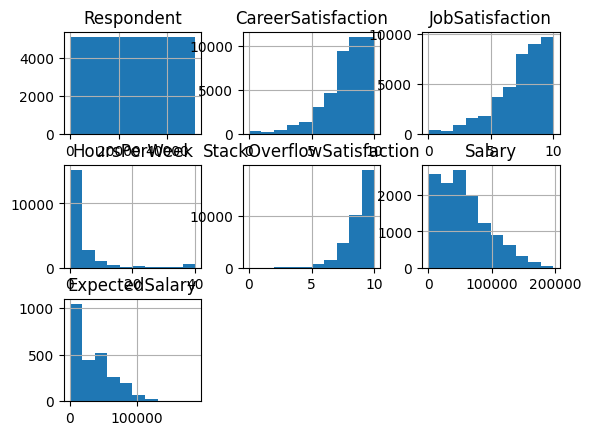

In [4]:
# The above are variables that python is treating as numeric variables, and therefore, we 
# could send them into our linear model blindly to predict the response
# Let's take a quick look at our data first

df.hist();

C:\Users\eusep\AppData\Local\Temp\ipykernel_14156\2925521588.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f");


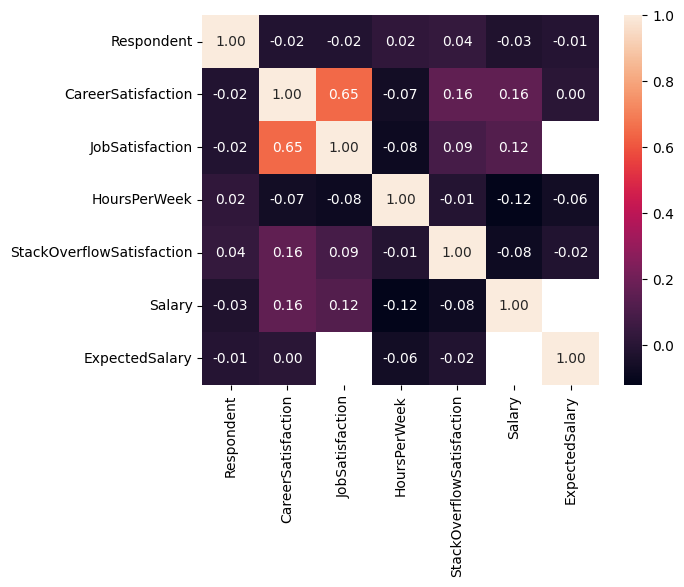

In [6]:
# Correaltion heatmap with only numeric variable
sns.heatmap(df.corr(), annot=True, fmt=".2f");

In [5]:
# Here we can see that none of our variables appear to greatly correlated with salary
# and we can see that if someone was given an expected salary question, they either
# never answered the salary question or they were not given the salary question


# We an still go ahead and make predictions using these variables as a reminder of the 
# scikit learn way of fitting models.  The process is similar to quickly fit models of 
# all types - usually a four step process of - instantiate, fit, predict, score
# In most cases, we also will want to split data into training and test data to assure 
# we are not building models that overfit the data and do not extend well to new situations.
# it will fail due to 
X = df[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
try:
    lm_model = LinearRegression(normalize=True) # Here you could set any hyperparameters of your model
    lm_model.fit(X_train, y_train) # If this model was to predict for new individuals, we probably would want
               # worry about train/test splits and cross-validation, but for now I am most 
               # interested in finding a model that just fits all of the data well
except:

    print ("An exception occurred: NAs in the data set")





An exception occurred: NAs in the data set


c:\Users\eusep\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [6]:
### Notice the above breaks because of the NaN values, so we either need to fill or remove them
# Or we could write a conditional model that fits differently 
# depending on the values that are missing - we can see the nans based on the describe above
df.shape


#________ Video 1 through here on introduction to the data - could do a bit more EDA ________#

(51392, 154)

In [7]:
### The easiest way to move onto a conclusion in a first pass is probably just with dropping

num_vars = df[['Salary', 'CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
df_dropna = num_vars.dropna(axis=0)

X = df_dropna[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y = df_dropna['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

lm_model = LinearRegression(normalize=True,fit_intercept=True) # Here you could set any hyperparameters of your model
lm_model.fit(X_train, y_train) # If this model was to predict for new individuals, we probably would want
               # worry about train/test splits and cross-validation, but for now I am most 
               # interested in finding a model that just fits all of the data well

        
y_test_preds = lm_model.predict(X_test) #We can then use our fitted model to predict the salary for each
                                        #indvidual in our test set, and see how well these predictions
                                        #match the truth.

print(r2_score(y_test, y_test_preds)) #In this case we are predicting a continuous, numeric response.  Therefore, common
print(mean_squared_error(y_test, y_test_preds)) #metrics to assess fit include Rsquared and MSE.

0.030994664959115625
1546382888.0495825


c:\Users\eusep\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [8]:
# Whoop - we built a model that predicts... but we are missing by ALOT!
# We can get a quick glimpse of how bad our predictions are...
# This suggests that 3% of the variability in salaries can be explained by these variables...
df_dropna.shape # But it also reduced our dataset to only 5338 rows 
                # ~20% of the original dataset size

(5338, 5)

# Recorded from here up what happen next


# Screencasts Remaining:
1. Imputation - first results
2. Categorical Variables - improved results, but what is happening?
3. Combat Overfitting - one method

In [9]:
# create a data frame comparing the expected vs predicted train test
preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
print(preds_vs_act.head())
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']
preds_vs_act.head()
preds_vs_act.describe()

              0             1
0  34408.602151  54632.316959
1   1182.795699  41700.350270
2  33750.000000  44195.215816
3  74660.633484  62622.374481
4  27149.321267  59371.351903


,actual,preds,diff
count,1602.000000,1602.000000,1602.000000
mean,53701.885139,53719.858649,-17.973511
std,39960.510105,8402.720029,39336.350243
min,0.000000,6667.232167,-70115.915646
25%,22026.148326,50293.411548,-29270.342328
50%,47505.656109,54820.348097,-6478.695180
75%,75000.000000,58810.329090,21023.294431
max,197000.000000,82847.181224,174666.812350


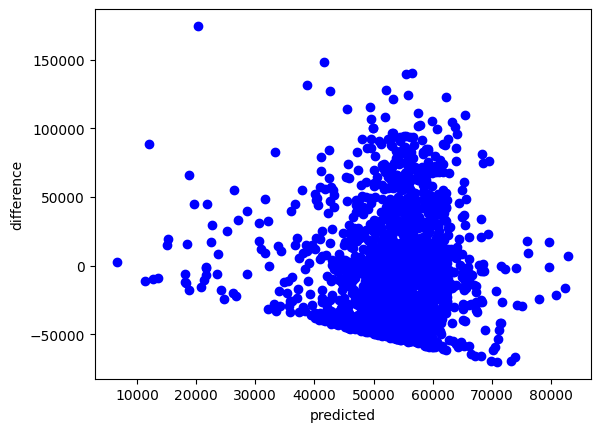

In [10]:
### We can plot how far our predictions are from the actual values compaired to the
### predicted values - you can see that it isn't uncommon for us to miss salaries by
### 150000 and the overpredictions tend to be much worse than the underpredictions
### THere also appears to be a trend where our differences decrease as the predicted
### values increase on the test data.

plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

In [12]:
#______Video 2 ____Our First Modeling Attempt (Mark all the bad things)________#

### There are tons of downfalls already - our predictions are pretty poor, we have predictions
### for only 20% of the total values that actually hold salaries, and we are only using 
### quantitative variables to predict.

### Given how bad the predictions are, we might not hurt anything by just filling the missing 
### values to make more predictions.

#Here we fill on the column means - num vars are the numerical variables
df_fillna = num_vars.apply(lambda x: x.fillna(x.mean()),axis=0)

X = df_fillna[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y = df_fillna['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

lm_model = LinearRegression(normalize=True) # Here you could set any hyperparameters of your model
lm_model.fit(X_train, y_train) # If this model was to predict for new individuals, we probably would want
               # worry about train/test splits and cross-validation, but for now I am most 
               # interested in finding a model that just fits all of the data well

        
y_test_preds = lm_model.predict(X_test) #We can then use our fitted model to predict the salary for each
                                        #indvidual in our test set, and see how well these predictions
                                        #match the truth.

print(r2_score(y_test, y_test_preds)) #In this case we are predicting a continuous, numeric response.  Therefore, common


0.007973798679677402


c:\Users\eusep\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [49]:
X.shape

(51392, 4)

In [13]:
### Now we can predict on everything, but our predictions are even worse!

preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']
preds_vs_act.head()
preds_vs_act.describe()

,actual,preds,diff
count,15418.000000,15418.000000,15418.000000
mean,56388.966652,56268.733638,120.233013
std,20060.747721,2030.926807,19980.245687
min,0.029364,43630.969341,-61634.654899
25%,56298.480641,55286.841997,-1813.277871
50%,56298.480641,56381.491465,-103.649382
75%,56298.480641,57505.754877,1406.605768
max,195000.000000,66901.260318,140781.264938


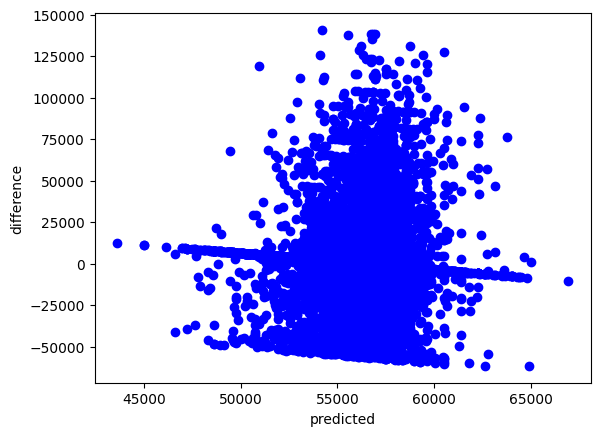

In [14]:
plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

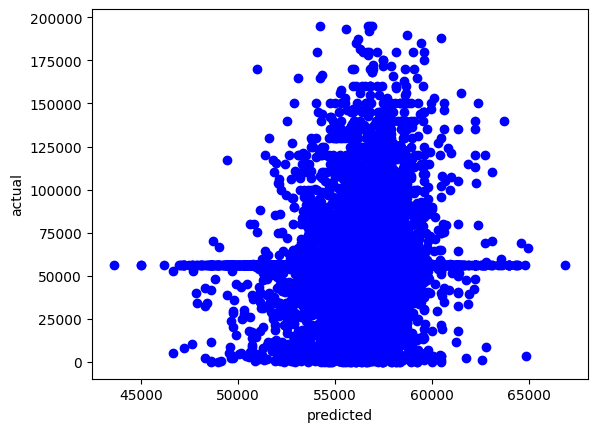

In [15]:
plt.plot(preds_vs_act['preds'], preds_vs_act['actual'], 'bo');
plt.xlabel('predicted');
plt.ylabel('actual'); #This looks less compelling that we are predicting well...
# I also think I found the mean amount...which aren't real 'actual' salaries

In [16]:
### Some strange line here - probably because we filled in our average for everything
### Which was actually data leakage.  We shouldn't have done this at all. We would likely
### Have to use the mean of the old data to fill in the missing of the future data...

### But this does depend a bit - if on future homes, you will have the x-variables before
### having to predict, this really isn't data leakage, as you would have the abiltiy to update
### the inputed means with each new individual in your dataset.

### Really the values that have the mean value for the salary should be dropped - because
### those are not true salaries.

# to drop the variable that we want to predict and we replaced NAs with mean
df_fillna = df_fillna.drop(df_fillna[df_fillna['Salary'] == np.mean(df['Salary'])].index)
df_fillna.shape # that's better. we only have this many non-null salaries in our original dataset


(12891, 5)

In [ ]:
#Below you can fit a new model with the missing salaries removed

In [17]:
X = df_fillna[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y = df_fillna['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

lm_model = LinearRegression(normalize=True) # Here you could set any hyperparameters of your model
lm_model.fit(X_train, y_train) # If this model was to predict for new individuals, we probably would want
               # worry about train/test splits and cross-validation, but for now I am most 
               # interested in finding a model that just fits all of the data well

        
y_test_preds = lm_model.predict(X_test) #We can then use our fitted model to predict the salary for each
                                        #indvidual in our test set, and see how well these predictions
                                        #match the truth.

print(r2_score(y_test, y_test_preds)) #In this case we are predicting a continuous, numeric response.  Therefore, common
print(mean_squared_error(y_test, y_test_preds)) #metrics to assess fit include Rsquared and MSE.  


0.03867318751274085
1489423021.6921308


c:\Users\eusep\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [18]:
##### Stop Video 2



### Now we can predict on everything, but our predictions are even worse!

preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']
preds_vs_act.shape

(3868, 3)

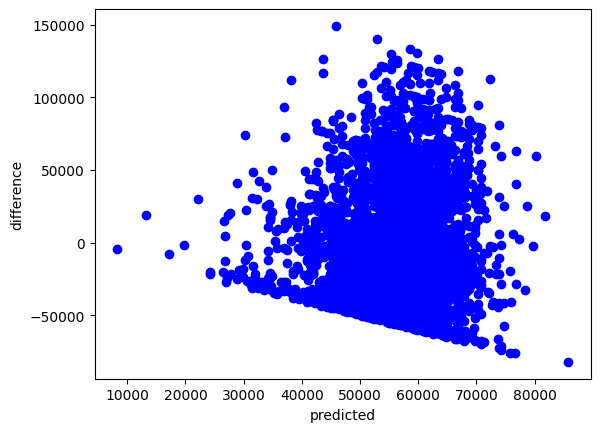

In [19]:
plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

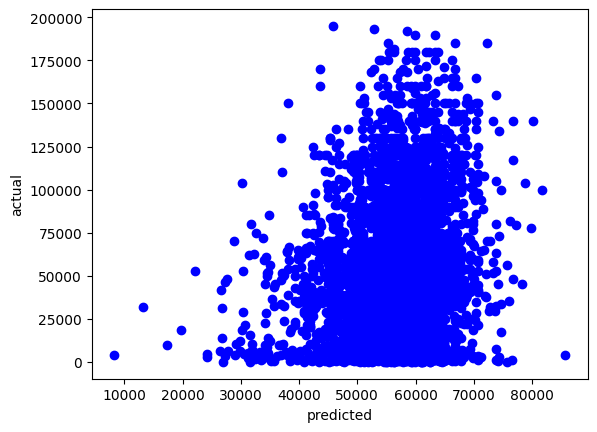

In [20]:
### When we see fan like shapes in the residual plots like this - it often suggests
### we might make better predictions on the log of the response

plt.plot(preds_vs_act['preds'], preds_vs_act['actual'], 'bo');
plt.xlabel('predicted');
plt.ylabel('actual'); #there appears to be a slight positive trend like we would want to see

In [21]:
#______Video 3 Fill in Missing values with the mean - why this is bad_______#


### Let's see how we might be able to use categorical variables in our models.
### Though you might try to do something smart to reduce the feature space of your
### x-matrix (like find curved relationships that exist in salary comparing across categories).
### It is probably easier to just blindly encode all of the categorical variables as dummy
### variables in our models.
### Selecting all the categorical variables
cat_vars_int = df.select_dtypes(include=['object']).copy().columns
# http://pbpython.com/categorical-encoding.html

len(cat_vars_int)


147

In [44]:
### Now that we have a list of all the dummy variables we might be interested in... 
### Let's dummy code them, so that we can use them in our machine learning models
### you can do this with pandas (get dummies) or with sklearn (one hot encoding)
### Feel free to use whatever you are comfortable with
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_new=  df.dropna(subset=['Salary'], axis=0)


cat_vars_int = df_new.select_dtypes(include=['object']).copy().columns
len(cat_vars_int)
df_new.shape

(12891, 154)

In [45]:
#creat dummy variable
count=0
for var in  cat_vars_int:
    # for each cat add dummy var, drop original column
    df_new = pd.concat([df_new.drop(var, axis=1), pd.get_dummies(df_new[var], prefix=var, prefix_sep='_', drop_first=True, dummy_na =False)], axis=1)
    

df_new.describe()
df_new.shape

KeyboardInterrupt: 

In [32]:
df_new.shape

(12891, 21110)

In [25]:


### Because we have more rows than number of variables, it is actually possible
### for us to build a model that uses all of the columns to predict the response...
### Whether this is actually a good idea or not is up for debate - let's maybe
### choose some variables that seem like they might be related to salary and go from there.

### You can also see that the nulls are still dropped after dummy encoding, which means
### we will again need to figure out what to do with rows where those values are null.
### It might be okay to just use the mode of the dataset to fill in those values - though
### in reality, a lack of answer is maybe an indication that your answer is different 
### from the group and therefore, you didn't want to answer the question.

### We know there are 12891 non-NaN salaries to predict based on the previous model - so we
### want to make sure we can predict all of these salaries with our new model as well, but now
### unlike the 5 columns we had to choose from before we have more than 40,000 to choose from.
### This could be a great place for some PCA or PLS, but I would like to try and keep 
### the interpretability of the features as much as possible... so I am just going to
### use the original features. 

### We could try even adding interactions or other combinations of these features, but again
### this would make our features less interpretable. So you have to weigh the pros and cons
### of adding these features.

In [26]:
df_result = pd.concat([df, df_fillna], axis=1, join='inner')
df_result.shape

(12891, 42347)

In [27]:
df_result['Salary'].head()['Salary']

,Salary,Salary
2,113750.0,113750.0
14,100000.0,100000.0
17,130000.0,130000.0
18,82500.0,82500.0
22,100764.0,100764.0


In [28]:
df_result = df_result.iloc[:,~df_result.columns.duplicated()]

In [29]:
df_result.shape

(12891, 42342)

In [30]:
### Now we have no duplicated columns, we can focus on which of our new columns (and the 
### previously used columns) we would like to use to try and predict the response.  We might
### just go based on intuition, or we could try to find the variables that are most correlated
### Don't get too high of hopes - having a quant variable correlated with a 1-0 variable
### is not really what correlation coefficients are designed to detect.  They are meant
### to find linear relationships between quant variables. Though correlations are not built for
### finding these relations - they can still give a sense of which variables are best related


### Actually if you try to build the correlation matrix... it might run for a long time, and
### not be very legible anyway... Let's just fit some stuff that seems interesting 
### and intuitive.

In [31]:
### Given how many columns we have to use - let's just drop all of the columns that have any
### missing values

df_result = df_result.dropna(axis=1, how='any')

In [32]:
df_result.shape # which is only 6, sooo that kind of sucks at narrowing down this mess...

(12891, 42336)

In [34]:
y = df_result['Salary']
X = df_result.drop(['Respondent', 'Salary'], axis=1)

In [35]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#lm_model = LinearRegression(normalize=True) # Here you could set any hyperparameters of your model
#lm_model.fit(X_train, y_train) # If this model was to predict for new individuals, we probably would want
               # worry about train/test splits and cross-validation, but for now I am most 
               # interested in finding a model that just fits all of the data well

        
#y_test_preds = lm_model.predict(X_test) #We can then use our fitted model to predict the salary for each
                                        #indvidual in our test set, and see how well these predictions
                                        #match the truth.

#print(r2_score(y_test, y_test_preds)) #In this case we are predicting a continuous, numeric response.  Therefore, common
#print(mean_squared_error(y_test, y_test_preds)) #metrics to assess fit include Rsquared and MSE.  
## Filling in the missing values does appear to have helped based on a preliminary check


In [36]:
#print(r2_score(y_train, lm_model.predict(X_train)))
#print(mean_squared_error(y_train, lm_model.predict(X_train))) # What does this mean?

To combat the overfitting we have a number of options, but one way that would also reduce our run time would be to remove columns from our dataframe.  You will notice that sklearn does not provide pvals back for our coefficients, but it performs ridge regression by default.  So, therefore, we can consider that columns that have larger coefficients are also more useful for predicting our response variable.  How large is large enough to consider keeping? Well, that is a great question, and I also don't have a great answer...  We can try some stuff and see what works. 

Then we can also run cross-validation and aggregate our results to combat the overfitting we saw earlier using this reduced X matrix.

In [62]:
# You could deal with these rare events in different ways - you could consider them as great predictors
# I am going to remove them - as I feel like they are likely not that indicative of other individuals
# I want to find overriding truths about the individuals who receive particular salaries.
# So, let's only consider columns where there are more than 1000 of the level of interest in the column.

reduce_X = X.iloc[:, np.where((X.sum() > 10) == True)[0]]
reduce_X.shape

(12891, 2637)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = .30, random_state=42)

lm_model = LinearRegression(normalize=True) # Here you could set any hyperparameters of your model
lm_model.fit(X_train, y_train) # If this model was to predict for new individuals, we probably would want
               # worry about train/test splits and cross-validation, but for now I am most 
               # interested in finding a model that just fits all of the data well

        
y_test_preds = lm_model.predict(X_test) #We can then use our fitted model to predict the salary for each
                                        #indvidual in our test set, and see how well these predictions
                                        #match the truth.

print(r2_score(y_test, y_test_preds)) #In this case we are predicting a continuous, numeric response.  Therefore, common
print(mean_squared_error(y_test, y_test_preds)) #metrics to assess fit include Rsquared and MSE.  
## Filling in the missing values does appear to have helped based on a preliminary check

0.674976343389
503572469.281


In [64]:
print(r2_score(y_train, lm_model.predict(X_train))) #In this case we are predicting a continuous, numeric response.  Therefore, common
print(mean_squared_error(y_train, lm_model.predict(X_train))) #metrics to assess fit include Rsquared and MSE.  
## Filling in the missing values does appear to have helped based on a preliminary check

0.838856972216
259108335.391


In [84]:
### Let's see what be the best number of features to use based on the test set performance
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result
    
    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:
        
        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True) 
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)
        
        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)
    
    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()
        
    best_cutoff = max(results, key=results.get)
    
    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True) 
    lm_model.fit(X_train, y_train)
        
    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

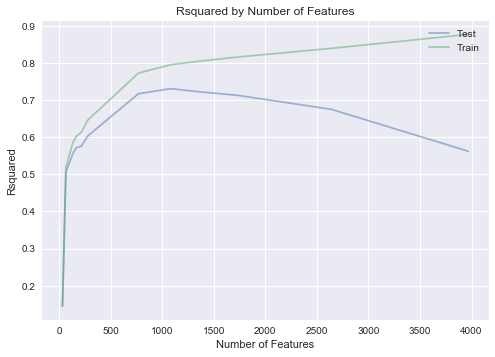

In [81]:
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 20, 10, 5]
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [82]:
#______Video 4 Creating Dummy Variables & Other Alternatives for Categorical Variables____#




### Now that we have the best model in terms of the r2 on the test data, we can use this model to see which features
### appear to be most important, and what impact they have on salary.

X_train.shape # we have 1081 features in the optimal model - let's look at some of them


(9023, 1081)

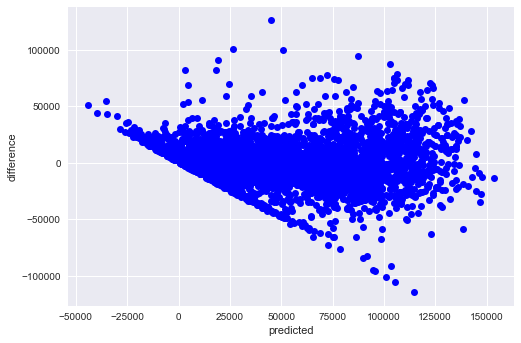

In [96]:
y_test_preds = lm_model.predict(X_test)

preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']

plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

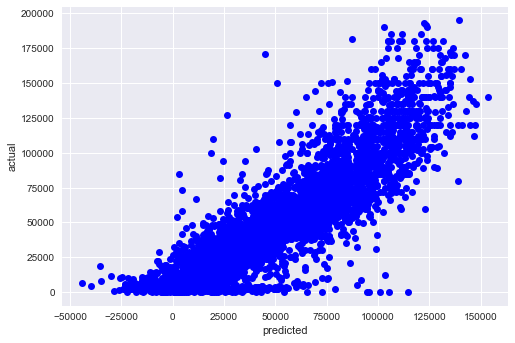

In [97]:
plt.plot(preds_vs_act['preds'], preds_vs_act['actual'], 'bo');
plt.xlabel('predicted');
plt.ylabel('actual'); #there appears to be a slight positive trend like we would want to see

In [122]:
coefs_df = pd.DataFrame()

coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = lm_model.coef_
coefs_df['abs_coefs'] = np.abs(lm_model.coef_)

coefs_df.sort_values('abs_coefs', ascending=False).head(20)

,est_int,coefs,abs_coefs
0,Professional_Professional developer,3.668536e+18,3.668536e+18
39,Country_United States,5.690911e+04,5.690911e+04
25,Country_Norway,4.020815e+04,4.020815e+04
5,Country_Australia,4.018075e+04,4.018075e+04
380,Currency_Swiss francs,3.683437e+04,3.683437e+04
12,Country_Denmark,3.018176e+04,3.018176e+04
24,Country_New Zealand,2.996317e+04,2.996317e+04
20,Country_Israel,2.964533e+04,2.964533e+04
10,Country_Canada,2.962889e+04,2.962889e+04
120,YearsCodedJob_20 or more years,2.960331e+04,2.960331e+04


In [116]:
lm_model.intercept_

-3.6685360312259738e+18

In [118]:
X_train.shape, sum(X_train['Professional_Professional developer'])


#_____Video 7 Interpretting the results_____#

((9023, 1081), 9023)

In [146]:
#____Video 8 - Ensemble Models______#

### One of the best out of the box methods for supervised machine learning
### is known as the RandomForest - let's see if we can use this model to outperform
### The linear model from earlier.

from sklearn.ensemble import RandomForestRegressor

### Let's see what be the best number of features to use based on the test set performance
def find_optimal_rf_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result
    kwargs - include the arguments you want to pass to the rf model
    
    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    rf_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:
        
        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response

        rf_model = RandomForestRegressor()  #no normalizing here, but could tune other hyperparameters
        rf_model.fit(X_train, y_train)
        y_test_preds = rf_model.predict(X_test)
        y_train_preds = rf_model.predict(X_train)
        
        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)
    
    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()
        
    best_cutoff = max(results, key=results.get)
    
    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    rf_model = RandomForestRegressor() 
    rf_model.fit(X_train, y_train)
        
    return r2_scores_test, r2_scores_train, rf_model, X_train, X_test, y_train, y_test

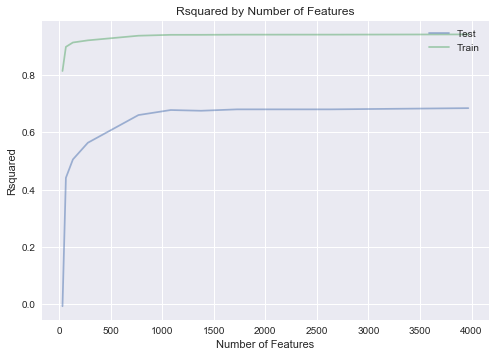

In [147]:
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 20, 10, 5]
r2_test, r2_train, rf_model, X_train, X_test, y_train, y_test = find_optimal_rf_mod(X, y, cutoffs)

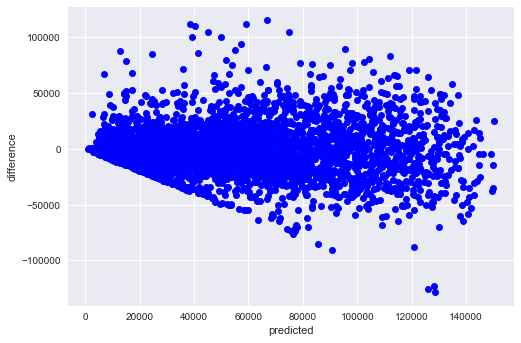

In [135]:
y_test_preds = rf_model.predict(X_test)

preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']

plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

In [148]:
#Looks like this overfits quite a bit... 

In [157]:
from sklearn.model_selection import GridSearchCV

### Let's see what be the best number of features to use based on the test set performance
def find_optimal_rf_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True, param_grid=None):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result
    kwargs - include the arguments you want to pass to the rf model
    
    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    rf_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''

    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        if param_grid==None:
            rf_model = RandomForestRegressor()  #no normalizing here, but could tune other hyperparameters

        else:
            rf_inst = RandomForestRegressor(n_jobs=-1, verbose=1)
            rf_model = GridSearchCV(rf_inst, param_grid, n_jobs=-1) 
            
        rf_model.fit(X_train, y_train)
        y_test_preds = rf_model.predict(X_test)
        y_train_preds = rf_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()
        
    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    if param_grid==None:
        rf_model = RandomForestRegressor()  #no normalizing here, but could tune other hyperparameters

    else:
        rf_inst = RandomForestRegressor(n_jobs=-1, verbose=1)
        rf_model = GridSearchCV(rf_inst, param_grid, n_jobs=-1) 
    rf_model.fit(X_train, y_train)
     
    return r2_scores_test, r2_scores_train, rf_model, X_train, X_test, y_train, y_test

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  42 tasks     

[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    5.7s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   10.5s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   12.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   38.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   30.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   37.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks 

[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jo

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.0min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.1min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks  

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 442 tasks  

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_job

[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   51.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   24.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   25.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.9min
[P

[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   30.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   30.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.3min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 792 

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.3s finished


[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.6min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks    

[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.9s finished
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    4.9s finished
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 23.8min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Done  4

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   29.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   29.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.4s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.5s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 14.4min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Done 1000 out of 

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   37.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   55.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks 

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   29.9s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   32.2s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   28.6s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.

[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.0min finished
[Parallel(n_jobs=4)]: Done  42 

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 31.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 40.7min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.0s 

[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.7min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks    

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.6min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.0min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: D

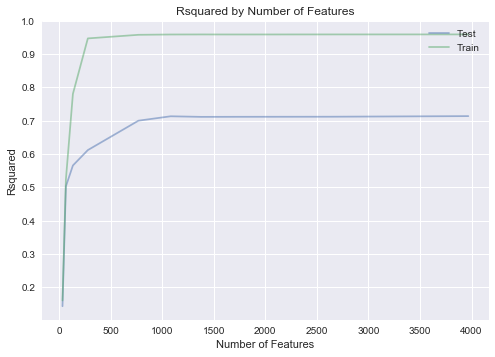

In [159]:
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 20, 10, 5]
params = {'n_estimators': [10, 100, 1000], 'max_depth': [1, 5, 10, 100]}
r2_test, r2_train, rf_model, X_train, X_test, y_train, y_test = find_optimal_rf_mod(X, y, cutoffs, param_grid=params)

[0.1434832190870845,
 0.50312830555464327,
 0.56587007612084017,
 0.61209835688773562,
 0.70037336638014969,
 0.71357758463021015,
 0.71179914641488184,
 0.71200015668392846,
 0.71225551954795407,
 0.71407567064339428]